In [1]:
import pickle

In [2]:
import os

In [3]:
os.getcwd()

'/lustre/work/statgrads/vpiyush2/DeepCDR_MEnKF-ANN'

In [112]:
with open('Real_World_EnKF_DeepCDR_Neurons_16_Gamma_500_var_weights_1_num_ens_801.pkl', 'rb') as f:
    deepcdr= pickle.load(f)  

In [173]:
import matplotlib.pyplot as plt

In [174]:
cur_idx = 9

In [175]:
import numpy as np

In [176]:
# deepcdr[cur_idx-1]

In [177]:
path = os.getcwd() + "//dataset_" + str(cur_idx) + "/"

## read in all the labels 
## for train test and valid
# y_train = np.load(path + "//" + "train_y.npy")
# y_valid = np.load(path + "//" + "valid_y.npy")
y_test = np.load(path + "//" + "test_y.npy")
    

In [178]:
# y_test

In [179]:
from sklearn.metrics import mean_squared_error

In [180]:
import seaborn as sns
import random

In [181]:
idx = np.sort(random.sample(range(0, y_test.shape[0]), k = 7))

In [182]:
idx

array([ 8, 28, 62, 64, 69, 91, 92])

In [183]:
to_compare = y_test.reshape(-1,1)[idx,:]

In [184]:
import pandas as pd

In [185]:
catch = []
for i in idx: 
    preds = deepcdr[cur_idx-1][-1][:,i,:]
    preds_df = pd.DataFrame(preds)
    preds_df.columns = ["EnKF_Preds"]
    preds_df["idx"] = i
    catch.append(preds_df)

In [186]:
all_df = pd.concat(catch)

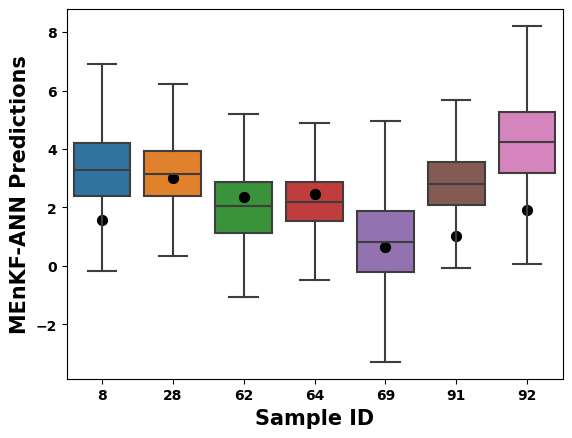

In [187]:
sns.boxplot(data=all_df, x="idx", y="EnKF_Preds", showfliers = False)
plt.scatter(range(0, len(idx)), to_compare, s = 50, c = "black")
plt.xlabel("Sample ID", fontweight = "bold", fontsize = 15)
plt.ylabel("MEnKF-ANN Predictions", fontweight = "bold", fontsize = 15)
plt.xticks(fontweight = "bold", fontsize = 10)
plt.yticks(fontweight = "bold", fontsize = 10)
plt.show()